# House Price Prediction : Advanced Regression Technique

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#### 1) Train data

In [2]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_rows',81) #Shows the full length output i.e. All Columns
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

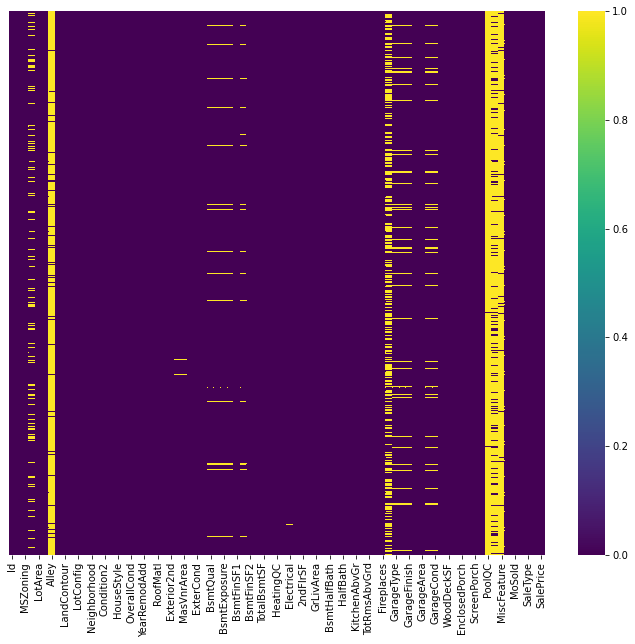

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

#### Fill missing values

In [8]:
train.drop(['Id'],axis=1,inplace=True)

In [9]:
# LotFrontage 259 missing values
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [10]:
# Alley 1369 missing values (very high number of missing values, so we can drop this column)
train.drop(['Alley'],axis=1, inplace=True)

In [11]:
# MasVnrType : 8 missing values
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

In [12]:
# MasVnrArea : 8 missing values
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [13]:
# BsmtQual : 37 missing values
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])

In [14]:
# BsmtCond : 37 missing values
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])

In [15]:
# BsmtExposure : 38 missing values
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])

In [16]:
# BsmtFinType1 : 37 missing values
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])

In [17]:
# BsmtFinType2 : 38 missing values
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

In [18]:
# Electrical : 1 missing value
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])

In [19]:
# FireplaceQu : 690 missing values
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])

In [20]:
# GarageType : 81 missing values
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])

In [21]:
# GarageYrBlt : 81 missing values
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])

In [22]:
# GarageFinish : 81 missing values
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])

In [23]:
# GarageQual : 81 missing values
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])

In [24]:
# GarageCond : 81 missing values
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [25]:
# PoolQC, Fence, MiscFeature : too much missing values so we can drop 
train.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1, inplace=True)

In [26]:
pd.set_option('display.max_rows',81) #Shows the full length output i.e. All Columns
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

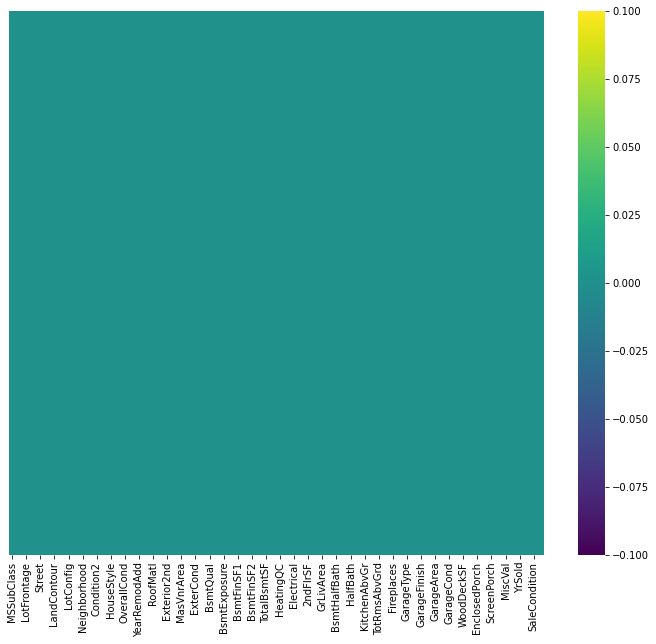

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [28]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [29]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


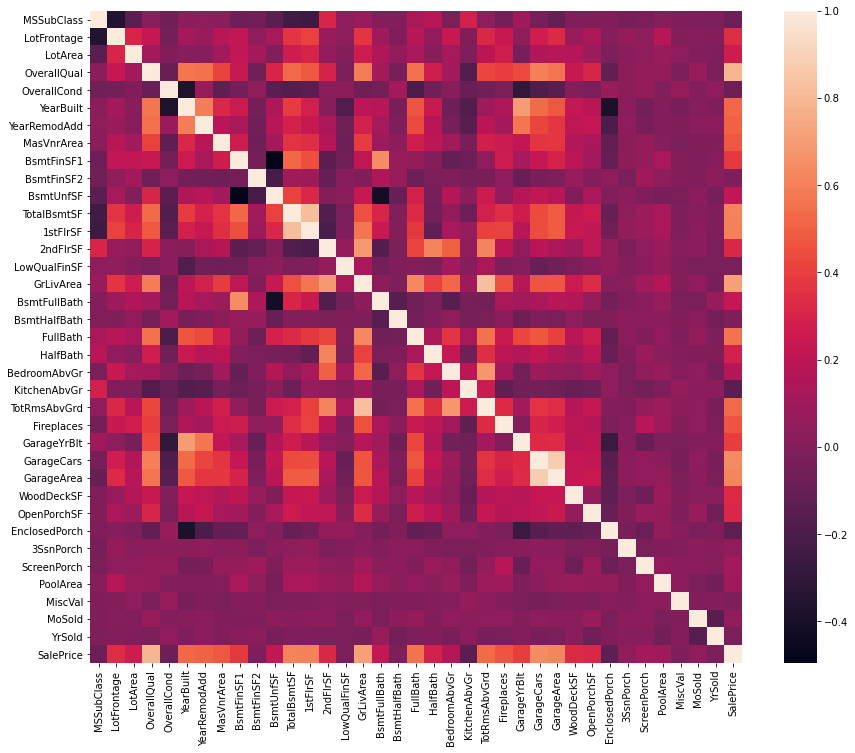

In [31]:
corrmat = train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corrmat,square = True )

#### 2) Test data

In [32]:
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


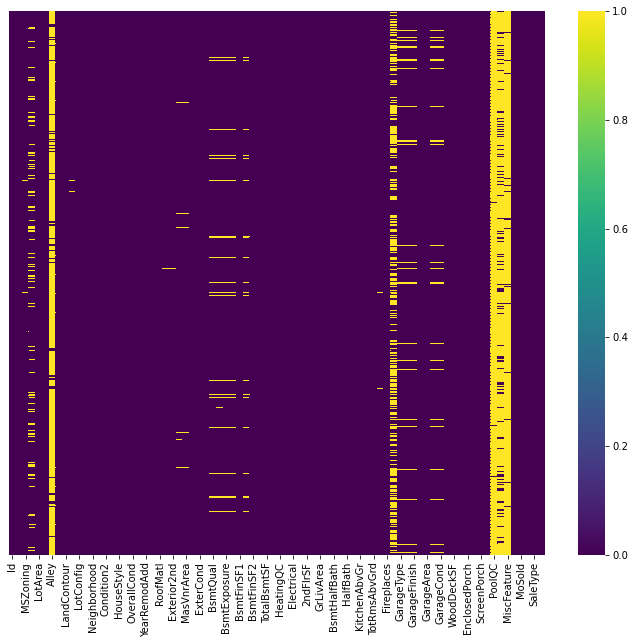

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(test.isnull(), yticklabels=False, cmap="viridis")

In [34]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### Fill missing values

In [36]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test.drop(['Alley'],axis=1,inplace=True)
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

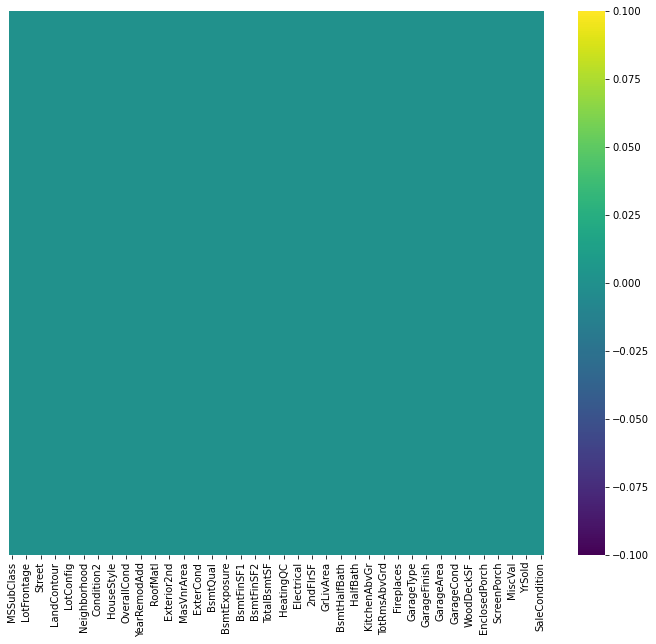

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(test.isnull(), yticklabels=False, cmap="viridis")

In [38]:
test.shape

(1459, 75)

In [39]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [40]:
data=pd.concat([train, test])

In [41]:
data.shape

(2919, 76)

In [42]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [43]:
cat_features=data.select_dtypes(include=['object']).columns
num_features=data.select_dtypes(exclude=['object']).columns

In [44]:
cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
All_cat=data[cat_features]
All_cat=pd.get_dummies(All_cat,drop_first=True)
All_cat

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
All_num=data[num_features]
All_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,24,0,0,0,0,0,4,2006,NaN
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,474,0,0,0,0,0,0,9,2006,NaN
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [47]:
df=pd.concat([All_cat, All_num], axis=1)
df.shape

(2919, 237)

In [48]:
df.isnull().sum()

MSZoning_FV       0
MSZoning_RH       0
MSZoning_RL       0
MSZoning_RM       0
Street_Pave       0
               ... 
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice      1459
Length: 237, dtype: int64

In [49]:
df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [50]:
df.isnull().sum()

MSZoning_FV       0
MSZoning_RH       0
MSZoning_RL       0
MSZoning_RM       0
Street_Pave       0
               ... 
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice      1459
Length: 237, dtype: int64

In [51]:
train.shape, test.shape

((1460, 76), (1459, 75))

In [52]:
df_train=df.iloc[:1460,:]
df_test=df.iloc[1460:, :]

In [53]:
df_train.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,0,0,1,0,1,0,0,1,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [54]:
df_train.tail()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,0,0,1,0,1,0,0,1,0,0,...,0,40,0,0,0,0,0,8,2007,175000.0
1456,0,0,1,0,1,0,0,1,0,0,...,349,0,0,0,0,0,0,2,2010,210000.0
1457,0,0,1,0,1,0,0,1,0,0,...,0,60,0,0,0,0,2500,5,2010,266500.0
1458,0,0,1,0,1,0,0,1,0,0,...,366,0,112,0,0,0,0,4,2010,142125.0
1459,0,0,1,0,1,0,0,1,0,0,...,736,68,0,0,0,0,0,6,2008,147500.0


In [55]:
df_test.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,0,0,1,0,0,1,0,0,...,140,0,0,0,120,0,0,6,2010,NaN
1,0,0,1,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,NaN
2,0,0,1,0,1,0,0,0,0,0,...,212,34,0,0,0,0,0,3,2010,NaN
3,0,0,1,0,1,0,0,0,0,0,...,360,36,0,0,0,0,0,6,2010,NaN
4,0,0,1,0,1,0,0,0,1,0,...,0,82,0,0,144,0,0,1,2010,NaN


In [56]:
df_test=df_test.drop(['SalePrice'], axis=1)

In [57]:
X=df_train.drop(['SalePrice'], axis=1)
Y=df_train['SalePrice']

In [58]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=43)

In [59]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

df_test=st_x.transform(df_test)

## Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=80,max_depth=5,random_state=1)

In [61]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=80, random_state=1)

In [62]:
y_pred=rfr.predict(x_test)

In [63]:
y_test

860     189950.0
1146    180000.0
1092    136500.0
1018    160000.0
628     135000.0
          ...   
527     446261.0
1414    207000.0
352      95000.0
393     100000.0
513     134000.0
Name: SalePrice, Length: 438, dtype: float64

In [64]:
y_pred

array([162818.96446634, 153956.97183302, 157612.4007697 , 188089.29345768,
       173374.42814589, 188889.90676332, 104613.73576152, 137583.64910495,
       115962.17195588, 215518.77354478, 140389.54787202, 343878.77873095,
       120324.06571645, 122912.63782379, 182888.64379548, 128164.14882306,
       133607.62121969,  92400.97970931, 151160.84683931, 136786.47433877,
       316819.15038029, 115036.31648213, 222238.64386848, 222124.52865435,
       202080.973669  , 376996.31802033, 114021.19890601, 146305.26520336,
       128922.76981854, 122228.42696959, 135031.43915416, 115883.28316366,
       133221.5557554 , 155453.603936  , 110261.58525416, 195916.08537652,
       429326.32350456, 177763.16384763, 224442.11250565, 136786.47433877,
       303207.5713673 , 186419.74152605,  85176.80542428, 149325.57152527,
       188791.70561881, 148288.32039293, 139138.13839787, 186401.88703439,
       158597.90738339, 160303.85751661, 125802.73726231, 140633.87717262,
       154382.9581515 , 4

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score: ",r2_score(y_test, y_pred))

MAE:  22175.87030463597
MSE:  1148691830.4015982
RMSE:  33892.35651886127
r2_score:  0.8289049871038736


## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=0.001)

In [68]:
Ridge.fit(x_train, y_train)

Ridge(alpha=0.001)

In [69]:
y_pred_Ridge=Ridge.predict(x_test)
y_pred_Ridge

array([ 175802.44495147,  182800.64976147,  171026.3420037 ,
        148262.7842471 ,  138810.14267618,  265908.40228031,
         95720.21206404,  128834.82506979,  132408.12729366,
        245276.86281036,  122828.16539673,  286995.49852782,
        131797.47240524,  111116.88033983,  203857.7121369 ,
         99944.15489733,  101934.99335855,   -8878.67006672,
        142537.44596137,  132017.7077446 ,  356976.2812206 ,
        122879.27040557,  226929.00819017,  255746.10825774,
        227220.48918286,  389638.33715599,  105686.04959845,
        145802.18228791,  146186.37676602,  101763.68096101,
        148859.34612849,   95590.40828634,  121626.03681383,
        158665.3807834 ,  101521.39859853,  195976.72546737,
        476255.28017424,  224938.78492177,  246275.65620361,
        134302.02459174,  345098.20541821,  173057.39936372,
         52508.97873004,  141496.49575816,  189825.77497389,
         86300.0519094 ,  144387.56527583,  199474.62182607,
        166796.97024045,

In [70]:
Ridge.intercept_

180580.43444227008

In [71]:
print("MAE: ", mean_absolute_error(y_test, y_pred_Ridge))
print("MSE: ", mean_squared_error(y_test, y_pred_Ridge))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_Ridge)))
print("r2_score: ",r2_score(y_test, y_pred_Ridge))

MAE:  19829.39793495019
MSE:  2173936370.198576
RMSE:  46625.490562551466
r2_score:  0.6761971649398387


## Lasso Regression

In [72]:
from sklearn.linear_model import Lasso
Lasso=Lasso(alpha=0.001)

In [73]:
Lasso.fit(x_train, y_train)

C:\Users\Shivanand A. Kasar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190840661541.78937, tolerance: 626688637.7919108
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [74]:
y_pred_Lasso=Lasso.predict(x_test)
y_pred_Lasso

array([ 175788.65823239,  182622.67408081,  171252.63704235,
        148266.36005259,  139069.19891287,  265942.8928782 ,
         95888.0129808 ,  128830.21508501,  132375.73784212,
        245262.71015424,  122853.21922837,  286995.68069985,
        131685.30508446,  111075.13787761,  203786.18747792,
         99903.68063131,  101793.00536376,   -9500.73831224,
        142480.28968051,  131997.10902542,  356999.63566825,
        122516.52085872,  226978.75030553,  255780.90108437,
        227417.3113229 ,  389651.98877763,  105645.26260494,
        145788.66930947,  146164.24384684,  101923.01618854,
        148831.32153943,   95384.76790206,  121582.92949106,
        158625.6651486 ,  101441.42235025,  195972.21314126,
        476217.68617277,  224890.59212107,  246360.69158031,
        134337.30821035,  345071.8306607 ,  173053.21243817,
         51535.74026789,  141516.1818071 ,  189830.87643952,
         86097.16989082,  144431.64476622,  199503.60843078,
        166679.52974734,

In [75]:
print("MAE: ", mean_absolute_error(y_test, y_pred_Lasso))
print("MSE: ", mean_squared_error(y_test, y_pred_Lasso))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_Lasso)))
print("r2_score: ",r2_score(y_test, y_pred_Lasso))

MAE:  19847.95684455672
MSE:  2174950342.6099777
RMSE:  46636.36287930243
r2_score:  0.6760461360753395


In [76]:
y_pred=rfr.predict(df_test)   # better r2_score

In [77]:
y_pred

array([128744.26256122, 147196.34505476, 180854.99466938, ...,
       147414.21773973, 123926.17123152, 214850.07225986])

In [78]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv("sample_submission.csv")
dataset=pd.concat([sub_df['Id'],pred],axis=1)
dataset.columns=['Id', 'SalePrice']
dataset.to_csv("SUBMISSION_0.csv", index=False)